# LSTM

[참고소스] http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import math

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

-------------------------------------------------------------------

## 1. Data 

### 1-1. Loading

In [6]:
rawdata = pd.read_csv("D:/2_Edu/5_Deep_Learning_Tensor/international-airline-passengers.csv", usecols = [1])

rawdata.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


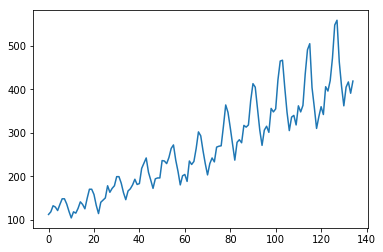

In [7]:
plt.plot(rawdata)

In [12]:
dataset = rawdata.values
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [13]:
dataset = dataset.astype('float32')
dataset

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [14]:
## Scale
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
dataset

array([[ 0.01758242],
       [ 0.03076923],
       [ 0.06153846],
       [ 0.05494505],
       [ 0.03736264],
       [ 0.06813186],
       [ 0.09670329],
       [ 0.09670329],
       [ 0.07032967],
       [ 0.03296703],
       [ 0.        ],
       [ 0.03076923],
       [ 0.02417582],
       [ 0.04835165],
       [ 0.08131868],
       [ 0.06813186],
       [ 0.04615384],
       [ 0.09890109],
       [ 0.14505494],
       [ 0.14505494],
       [ 0.11868131],
       [ 0.06373626],
       [ 0.02197802],
       [ 0.07912087],
       [ 0.09010988],
       [ 0.1010989 ],
       [ 0.16263735],
       [ 0.12967032],
       [ 0.14945054],
       [ 0.16263735],
       [ 0.20879123],
       [ 0.20879123],
       [ 0.17582417],
       [ 0.12747252],
       [ 0.09230769],
       [ 0.13626373],
       [ 0.14725274],
       [ 0.16703296],
       [ 0.19560441],
       [ 0.16923076],
       [ 0.17362636],
       [ 0.25054947],
       [ 0.27692309],
       [ 0.30329672],
       [ 0.23076925],
       [ 0

### 1-2. Train/Test set

In [16]:
train_size = int(len(dataset) * 0.7)
test_size  = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset),:]

len(train)/len(dataset), len(test)/len(dataset)

(0.6962962962962963, 0.3037037037037037)

In [22]:
def create_dataset(dataset, look_back = 1):
    """
    - look_back: number of previous time steps
    """
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(Y)


look_back = 1
train_X, train_y = create_dataset(train, look_back)
test_X,  test_y  = create_dataset(test,  look_back)

### 1-3. Reshape

 - input >> [samples, time steps, features]

In [25]:
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X  = np.reshape(test_X,  (test_X.shape[0],  1, test_X.shape[1]))

--------------------------------------------------------------

## 2. LSTM using Keras

### 2-1. Modeling

    - 1 input layer
    - 4 hidden layer
    - 1 output layer
    - adam
    - 100 epochs
    - 1 batch_size

In [26]:
model = Sequential()
model.add(LSTM(4, input_dim = look_back))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.fit(train_X, train_y, nb_epoch = 100, batch_size = 1, verbose = 2)

Epoch 1/100
1s - loss: 0.0363
Epoch 2/100
0s - loss: 0.0169
Epoch 3/100
0s - loss: 0.0125
Epoch 4/100
0s - loss: 0.0112
Epoch 5/100
0s - loss: 0.0102
Epoch 6/100
0s - loss: 0.0090
Epoch 7/100
0s - loss: 0.0080
Epoch 8/100
0s - loss: 0.0070
Epoch 9/100
0s - loss: 0.0060
Epoch 10/100
0s - loss: 0.0051
Epoch 11/100
0s - loss: 0.0044
Epoch 12/100
0s - loss: 0.0038
Epoch 13/100
0s - loss: 0.0034
Epoch 14/100
0s - loss: 0.0031
Epoch 15/100
0s - loss: 0.0028
Epoch 16/100
0s - loss: 0.0026
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0026
Epoch 19/100
0s - loss: 0.0025
Epoch 20/100
0s - loss: 0.0025
Epoch 21/100
0s - loss: 0.0025
Epoch 22/100
0s - loss: 0.0025
Epoch 23/100
0s - loss: 0.0025
Epoch 24/100
0s - loss: 0.0025
Epoch 25/100
0s - loss: 0.0024
Epoch 26/100
0s - loss: 0.0025
Epoch 27/100
0s - loss: 0.0024
Epoch 28/100
0s - loss: 0.0025
Epoch 29/100
0s - loss: 0.0024
Epoch 30/100
0s - loss: 0.0024
Epoch 31/100
0s - loss: 0.0024
Epoch 32/100
0s - loss: 0.0024
Epoch 33/100
0s -

### 2-2. Predict

In [27]:
train_pred = model.predict(train_X)
test_pred  = model.predict(test_X)

train_pred = scaler.inverse_transform(train_pred)
train_y    = scaler.inverse_transform([train_y])
test_pred  = scaler.inverse_transform(test_pred)
test_y     = scaler.inverse_transform([test_y])

### 2-3. Accuracy

In [28]:
train_score = math.sqrt(mean_squared_error(train_y[0], train_pred[:,0]))
test_score  = math.sqrt(mean_squared_error(test_y[0],  test_pred[:,0]))

### 2-5. Plot

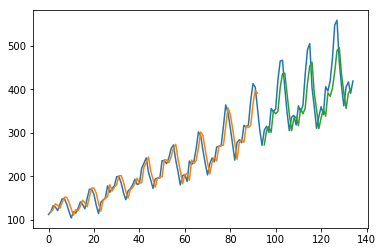

In [29]:
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:,:] = np.nan
train_pred_plot[look_back:len(train_pred)+look_back, :] = train_pred

test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred)+(look_back*2)+1:len(dataset)-1, :] = test_pred


plt.plot(scaler.inverse_transform(dataset))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.show()

-----------------------------------------------------------

*End of Code*